# Project Description


- Origin

    The origin of the boston housing data is Natural.
    
-Number of Cases

    The dataset contains a total of 506 cases.

-Variables
    
    There are 14 attributes in each case of the dataset. They are:
    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's
- Target
    Predict the average number of rooms per house (RM)
    


# Data Loading & Preprocessing

In [69]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline

df = pd.read_csv(r'C:\Users\BostonHousing.csv')
df.head()
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

# Exploring Features


exploring the data is very importanat before training the model as it helps to understand the relationship of the target variable with other features.

first we plot the distribution of the target variable RM. here we used the distplot function from the seaborn library.
- findings: We find out that the values of RM are distributed normally with few outliers.

Next, we create a correlation matrix to measure the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.
- findings: To fit a linear regression model, we select those features which have a high correlation with our target variable RM. By looking at the correlation matrix we can see that MEDV has a strong positive correlation with RM (0.7) where as LSTAT has a high negative correlation with RM (-0.61).

Lastly, we use  scatter plot to see how these features(MEDV and LSTAT) vary with our target RM.
- findings: we can see that RM increases as MEDV increase. And RM decreases as LSTAT increase.


C:\Users\kaled\Anaconda3\envs\ml_course_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


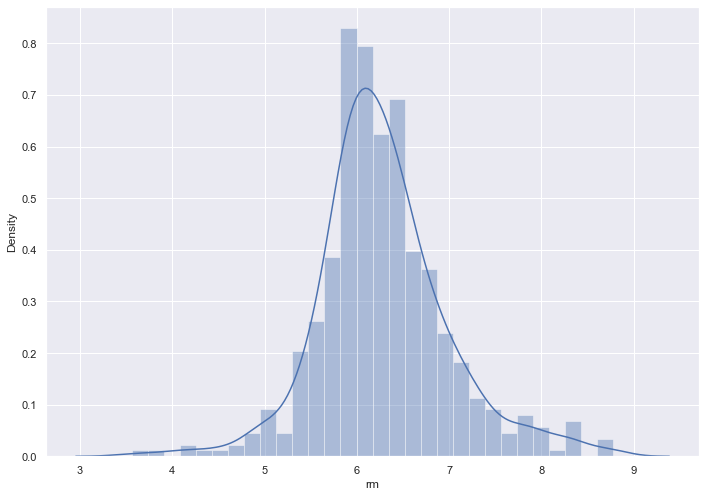

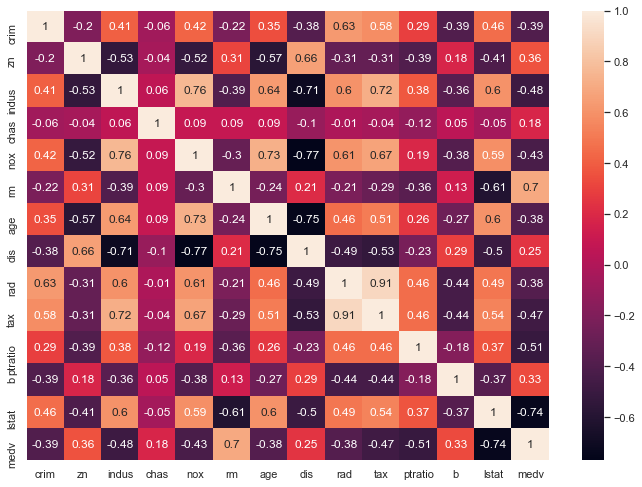

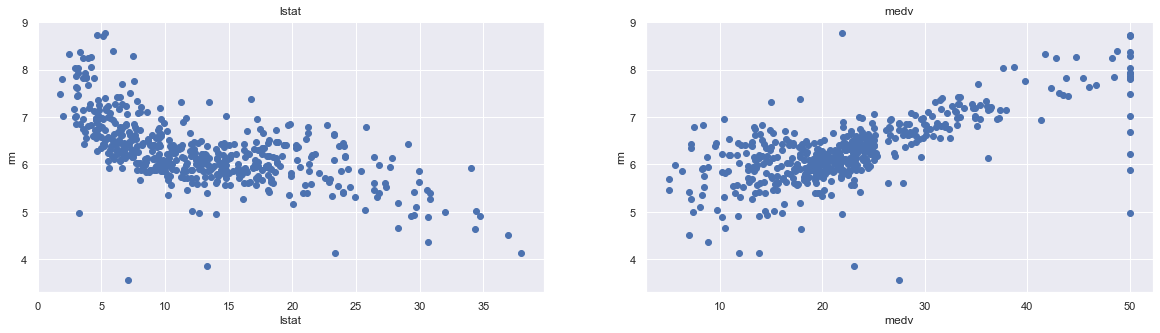

In [70]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['rm'], bins=30)
plt.show()

correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

plt.figure(figsize=(20, 5))

features = ['lstat', 'medv']
target = df['rm']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('rm')
#

# Data Partitioning

-First we split the data into training and evaluation sets using train_test_split function provided by scikit-learn library.

Then we split the model into: 80% training , 20% testing. 

-pros: splitting provides a way to validate the model using the 20% of samples. 

-cons: The occurrence of overfitting is possible.

In [71]:

X = pd.DataFrame(np.c_[df['lstat'], df['medv']], columns = ['lstat','medv'])
Y = df['rm']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# Training Process

- used Linear Regression
- we choose Linear Regression as it is able to find the relationship between the variables.
-Pros: when we know the relation between the independent and dependent variables have a linear relationship, using this model is less complex compared to other alogorithms.
-cons: outliers can have huge effects on the regression and boundaries are linear in this technique.


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluation Process

-we use RMSE and R2- as our evaluation metrics.
-RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. 
-R2 gives an indication of how good a model fits a given dataset.

In [73]:

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.5119454740470342
R2 score is 0.4528031462840041


The model performance for testing set
--------------------------------------
RMSE is 0.4194931001726314
R2 score is 0.6781684382161517


# Results and Conclusions

C:\Users\kaled\Anaconda3\envs\ml_course_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


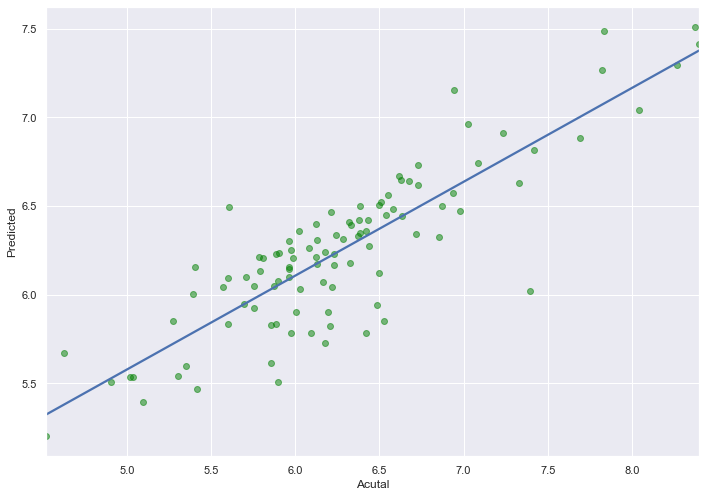

In [74]:

sns.regplot(Y_test, y_test_predict, ci=None, scatter_kws={"color": "green", 'alpha':0.5})
plt.ylabel("Predicted")
plt.xlabel("Acutal")
plt.show()
